# Perceptron-Based Classification Model

- It is a linear binary classifier that uses a single-layer (single neuron) NN to make predictions based on weighted inputs.
- Steps:
    1. Import the required libraries. We'll be using `sklearn`
    2. Load and plot the data
    3. Fit the model
    4. Evaluate

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/mnist_train.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(60000, 785)

## About The MNIST Data
- MNIST (Modified National Institute of Standards and Technology) is a large dataset of handwritten digits that is commonly used for training various image processing systems(DNN and CNN)
- It's considered the "Hello, World" of deep learning
- The images are black and white and fit into 28x28 pixel bounding box.

> In this dataset, the images are flattened (one row for each image). Sometimes you need to use a flattening layer to pass the data if it's in 2D. This is only for DNN. CNN works with 2D without flattening.

- We have 28 x 28 + 1 = 785 columns
- We have 60K rows = num of images

![7](https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image-300x298.png)

In [4]:
28 * 28

784

In [ ]:
df.min().min()

In [5]:
df.isna().sum().sum()

0

In [ ]:
df['label'].value_counts(sort=False).plot(kind='bar')

In [6]:
print(f'Max value:{df.max().max()} and Min value {df.min().min()}')

Max value:255 and Min value 0


- Here 0 represents the absence of the color(white). Therefore, it's black. 
- And 255 represents the intensity of the color (White)

In [7]:
X = df.drop(columns='label')
y = df['label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)

Let's build our Perceptron function

In [9]:
per_model = Perceptron()

In [10]:
per_model.fit(X_train, y_train)

Perceptron()

## Metrics Evaluation

In [11]:
y_pred = per_model.predict(X_test)
y_pred

array([3, 4, 3, ..., 4, 3, 2])

In [12]:
accu_score = accuracy_score(y_true=y_test, y_pred=y_pred)

In [13]:
print('Accuracy Score:', accu_score)

Accuracy Score: 0.872


## Visual Evaluation

To visualize the image, we need to convert the data from flattened 1D to 2D 

In [14]:
first_img_data = X.iloc[0].values.reshape(28,28)
first_img_data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

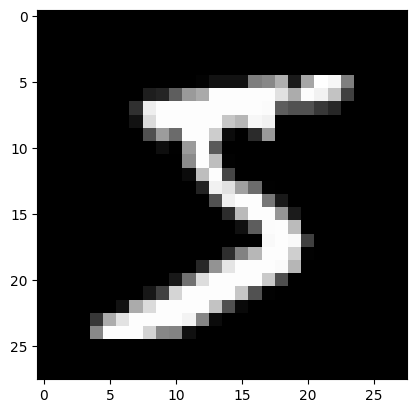

In [15]:
plt.imshow(first_img_data, cmap='gray')

we can see the ink residue on the sides.

Use the technique above to compare the predicted label to the actual image

In [ ]:
num_samples = 15
sample_X = X.sample(num_samples)
sample_images = sample_X.values.reshape(num_samples, 28, 28) #15 images, 28 x 28 pixels
sample_labels_pred = per_model.predict(sample_X)


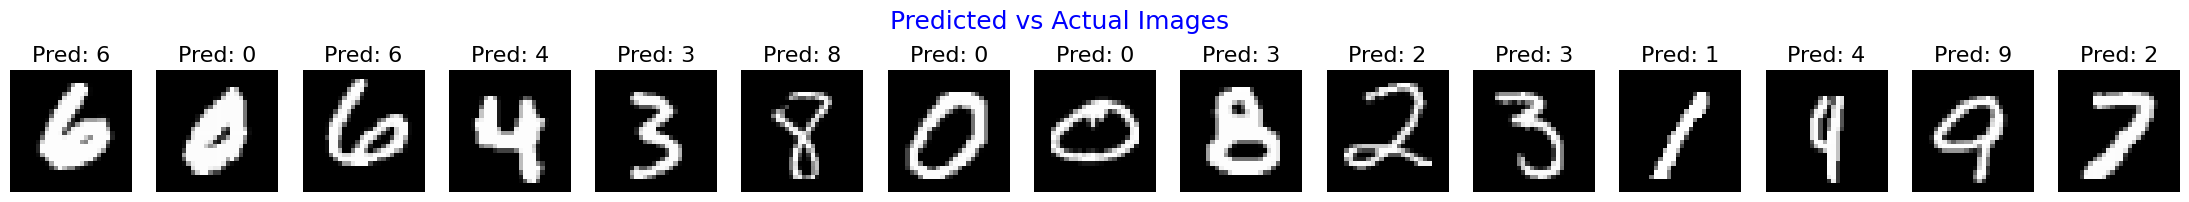

In [30]:
plt.figure(figsize=(28, 3))
plt.suptitle("Predicted vs Actual Images", fontsize=18, color='Blue', y=0.9)


for img in range(num_samples):
    plt.subplot(1, num_samples, img +1)
    plt.imshow(sample_images[img], cmap='gray')
    plt.title(f'Pred: {sample_labels_pred[img]}', fontsize=16)
    plt.axis('off')